In [1]:
#adding libraries
import csv          
import requests     
import numpy as np  
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from matplotlib import pylab
import pylab as pltb
from sklearn import *
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
my_dataset = pd.read_csv('train.csv')
#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
my_dataset["Sex"] = my_dataset["Sex"].astype('category')
my_dataset["Embarked"] = my_dataset["Embarked"].astype('category')
my_dataset["Cabin"] = my_dataset["Cabin"].astype('category')
#New columns are created for categorical attributes and their values are converted to numeric values
my_dataset["Sex"] = my_dataset["Sex"].cat.codes
my_dataset["Embarked"] = my_dataset["Embarked"].cat.codes
my_dataset["Cabin"] = my_dataset["Cabin"].cat.codes

#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int16
Embarked          int8
dtype: object


In [4]:
#Columns of the category type are discarded for further work
my_reduced_dataset = my_dataset[["PassengerId","Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]
#Column names are displayed
print(my_reduced_dataset.columns)
#The first 7 data objects in the dataset are displayed
print(my_reduced_dataset.head(7))
#Dataset data are displayed
print(my_reduced_dataset.describe())
print(my_reduced_dataset.info()) 

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  \
0            1         0       3    1  22.0      1      0   7.2500     -1   
1            2         1       1    0  38.0      1      0  71.2833     81   
2            3         1       3    0  26.0      0      0   7.9250     -1   
3            4         1       1    0  35.0      1      0  53.1000     55   
4            5         0       3    1  35.0      0      0   8.0500     -1   
5            6         0       3    1   NaN      0      0   8.4583     -1   
6            7         0       1    1  54.0      0      0  51.8625    129   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  
5         1  
6         2  
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000

In [5]:
my_working_dataset=my_reduced_dataset.copy()
my_working_dataset['Age']=my_working_dataset['Age'].fillna(my_working_dataset['Age'].mean())
my_working_dataset['Cabin']=my_working_dataset['Cabin'].fillna(my_working_dataset['Cabin'].mean())
#Adding missing values and then printing info again
print(my_working_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int16  
 9   Embarked     891 non-null    int8   
dtypes: float64(2), int16(1), int64(5), int8(2)
memory usage: 52.3 KB
None


In [6]:
#checking if values have been converted right 
print(my_working_dataset['Sex'].value_counts())
print(my_working_dataset['Embarked'].value_counts())
print(my_working_dataset['Cabin'].value_counts())

1    577
0    314
Name: Sex, dtype: int64
 2    644
 0    168
 1     77
-1      2
Name: Embarked, dtype: int64
-1      687
 63       4
 145      4
 47       4
 62       3
       ... 
 124      1
 76       1
 72       1
 125      1
 60       1
Name: Cabin, Length: 148, dtype: int64


In [7]:
#fixed the -1 values and set them to zero
my_working_dataset["Embarked"].mask(my_working_dataset["Embarked"] == -1, 0, inplace=True)
my_working_dataset["Cabin"].mask(my_working_dataset["Cabin"] == -1, 0, inplace=True)
print(my_working_dataset['Cabin'].value_counts())
print(my_working_dataset['Embarked'].value_counts())
print(my_working_dataset['Survived'].value_counts())

0      688
145      4
63       4
47       4
141      3
      ... 
85       1
65       1
124      1
76       1
60       1
Name: Cabin, Length: 147, dtype: int64
2    644
0    170
1     77
Name: Embarked, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [8]:
#Scaling numeric values to between 0-1
my_working_dataset['Fare']=(my_working_dataset['Fare']-my_working_dataset['Fare'].min())/(my_working_dataset['Fare'].max()-my_working_dataset['Fare'].min())
my_working_dataset['Cabin']=(my_working_dataset['Cabin']-my_working_dataset['Cabin'].min())/(my_working_dataset['Cabin'].max()-my_working_dataset['Cabin'].min())
my_working_dataset['Age']=(my_working_dataset['Age']-my_working_dataset['Age'].min())/(my_working_dataset['Age'].max()-my_working_dataset['Age'].min())
print(my_working_dataset.head(10))
print(my_working_dataset.describe())

   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1  0.271174      1      0  0.014151   
1            2         1       1    0  0.472229      1      0  0.139136   
2            3         1       3    0  0.321438      0      0  0.015469   
3            4         1       1    0  0.434531      1      0  0.103644   
4            5         0       3    1  0.434531      0      0  0.015713   
5            6         0       3    1  0.367921      0      0  0.016510   
6            7         0       1    1  0.673285      0      0  0.101229   
7            8         0       3    1  0.019854      3      1  0.041136   
8            9         1       3    0  0.334004      0      2  0.021731   
9           10         1       2    0  0.170646      1      0  0.058694   

      Cabin  Embarked  
0  0.000000         2  
1  0.554795         0  
2  0.000000         2  
3  0.376712         2  
4  0.000000         2  
5  0.000000         1  
6  0.8

<AxesSubplot:>

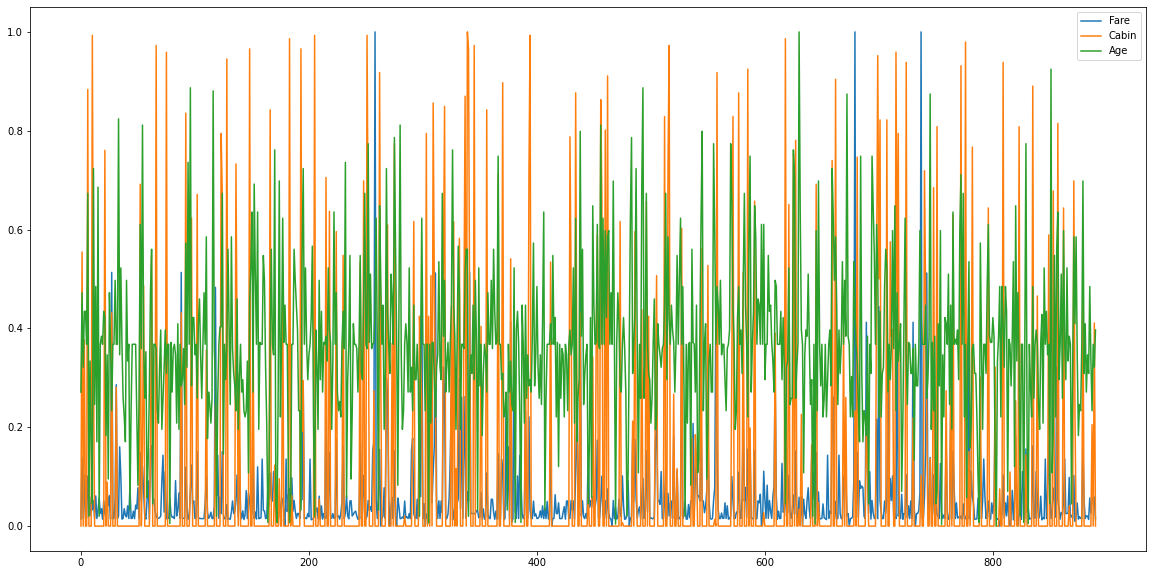

In [9]:
data_for_visualisation = my_working_dataset[["Fare","Cabin","Age"]]
#Representing values for continues features
data_for_visualisation.plot(figsize=(20,10))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Cabin'}>],
       [<AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

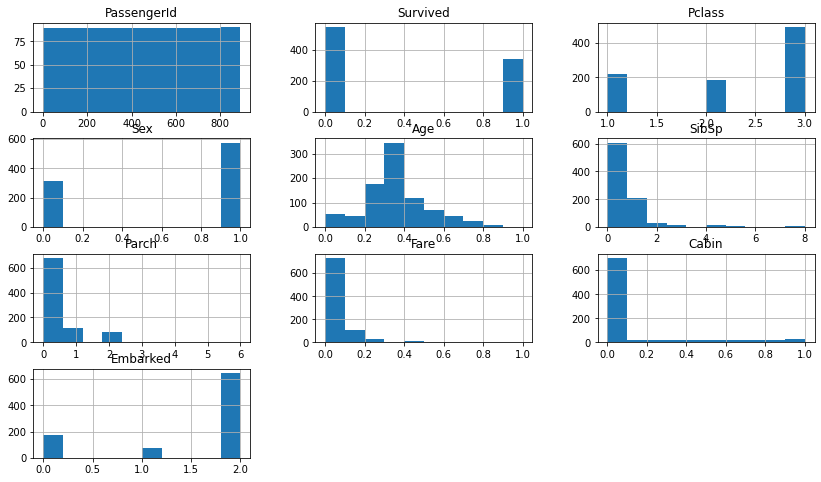

In [10]:
my_working_dataset.hist(figsize=(14,8))

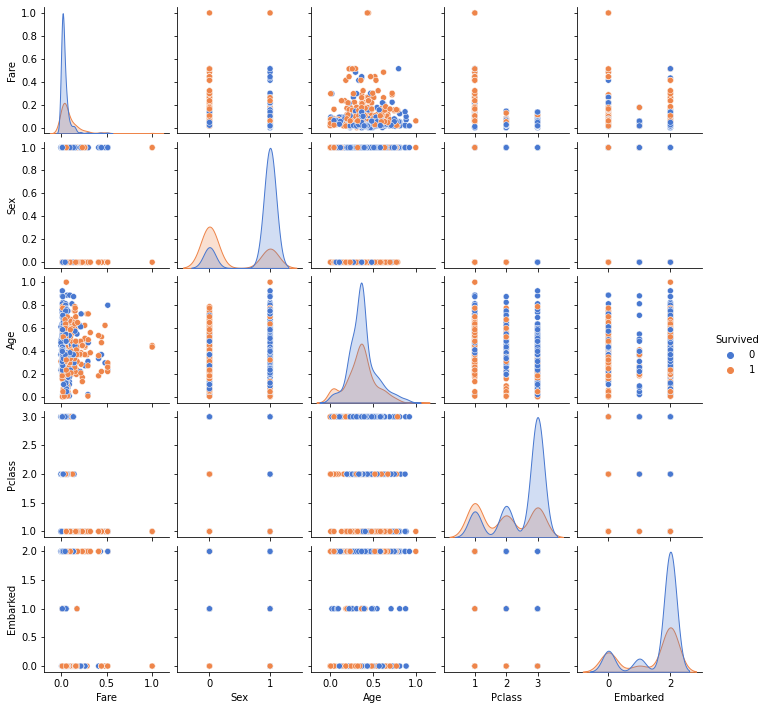

In [30]:
#Creating a pairplot
my_pairplot = sns.pairplot(my_working_dataset,hue='Survived',palette="muted",height=2,vars=['Fare','Sex','Age', 'Pclass','Embarked'],kind='scatter')

#Giving a title of the pairplot


#Sex 1= male 0 = female 
#Survived 0 = no 1 = yes 

<AxesSubplot:>

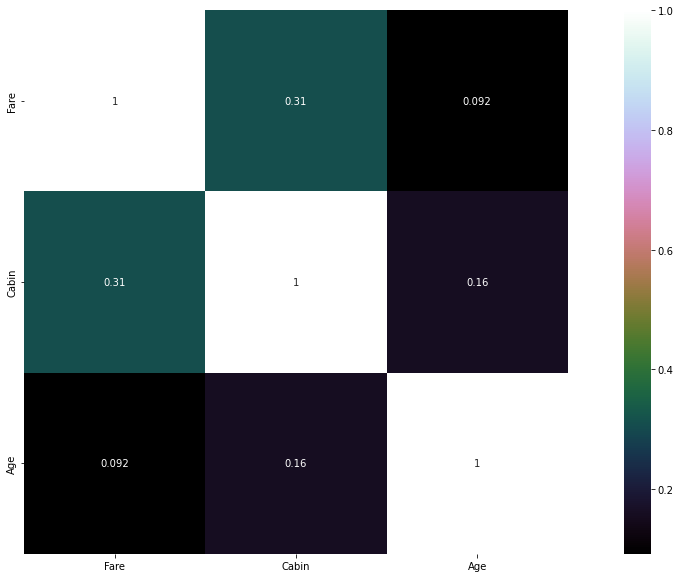

In [12]:
#A correlation matrix is created, showing the correlation coefficient for the numeric features. 
my_correlation_matrix=data_for_visualisation.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(my_correlation_matrix,vmax=1,square=True,annot=True,cmap='cubehelix')

Text(0.5, 1.0, 'Boxplot of Class')

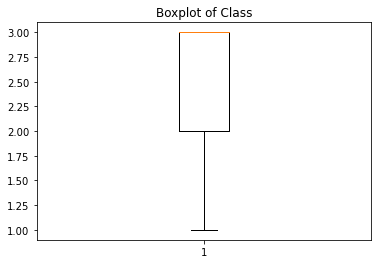

In [13]:
plt.boxplot(my_working_dataset.iloc[:, 2]) #class boxplot
plt.title('Boxplot of Class')

Text(0.5, 1.0, 'Boxplot of age')

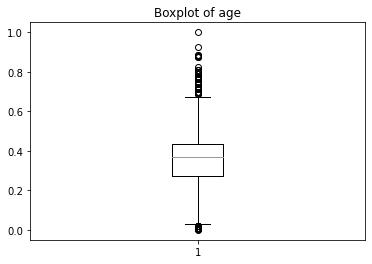

In [14]:
plt.boxplot(my_working_dataset.iloc[:, 4])
plt.title('Boxplot of age')#age boxplot

Text(0.5, 1.0, 'Boxplot of price')

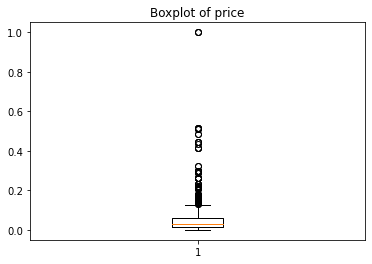

In [15]:
plt.boxplot(my_working_dataset.iloc[:, 7])
plt.title('Boxplot of price')#fare/price boxplot 

In [16]:
#acquring class labels available in the dataset
my_class_labels = my_working_dataset['Survived'].unique()
#displaying unique class labels
print("Class labels", my_class_labels,'\n')
#Coding classes for easier use
my_class_labels_coded = preprocessing.LabelEncoder()
my_class_labels_coded.fit(my_working_dataset['Survived'])
print(my_class_labels_coded.classes_)

Class labels [0 1] 

[0 1]


In [31]:
#leaving only 5 features for further processing
my_working_dataset_5_features=my_working_dataset[["Pclass","Sex","Fare","Age","Embarked"]]
#saving the target values of the data object
targets = my_working_dataset['Survived']
#specifying the proportion of data objects that will form the training dataset (90%)
training_proportion = 0.9
#plotting the dataset into test and train sets using a random 90:10 split
X_train, X_test, y_train, y_test = train_test_split(my_working_dataset_5_features, targets, test_size=1.0 - training_proportion, random_state=42)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [32]:
#nural network default 0.001 learning
my_ann_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'relu', solver='sgd', verbose = 0)
my_ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, solver='sgd',
              verbose=0)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90



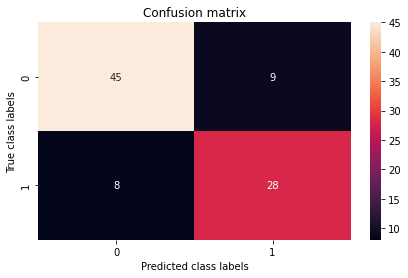

In [33]:
# trained model with a test set to obtain predictions
y_predictions = my_ann_model.predict(X_test)
#displaying results
print(classification_report(my_class_labels_coded.inverse_transform(y_test),my_class_labels_coded.inverse_transform(y_predictions), zero_division=0))

my_confusion_matrix = confusion_matrix(my_class_labels_coded.inverse_transform(y_test), my_class_labels_coded.inverse_transform(y_predictions))

fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_class_labels_coded.classes_);
ax.yaxis.set_ticklabels(my_class_labels_coded.classes_);

In [36]:
from sklearn.linear_model import LogisticRegression
#logisticregression
logreg = LogisticRegression(max_iter= 100, solver = 'liblinear')

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
print(classification_report(my_class_labels_coded.inverse_transform(y_test),my_class_labels_coded.inverse_transform(y_pred), zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.76      0.81      0.78        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



In [37]:
from sklearn.ensemble import RandomForestClassifier


#Random Forest Classifier
rf_clf = RandomForestClassifier()

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_predForrest = rf_clf.predict(X_test)
print(classification_report(my_class_labels_coded.inverse_transform(y_test),my_class_labels_coded.inverse_transform(y_predForrest), zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        54
           1       0.72      0.81      0.76        36

    accuracy                           0.80        90
   macro avg       0.79      0.80      0.80        90
weighted avg       0.81      0.80      0.80        90



              precision    recall  f1-score   support

           0       0.77      0.67      0.71        54
           1       0.58      0.69      0.63        36

    accuracy                           0.68        90
   macro avg       0.67      0.68      0.67        90
weighted avg       0.69      0.68      0.68        90



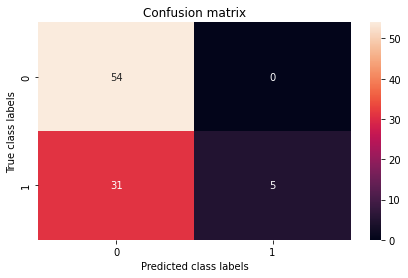

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=2, min_samples_split=2, min_weight_fraction_leaf = 0.4 )

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_predTree = clf.predict(X_test)
#show results
print(classification_report(my_class_labels_coded.inverse_transform(y_test),my_class_labels_coded.inverse_transform(y_predTree), zero_division=0))
my_confusion_matrix = confusion_matrix(my_class_labels_coded.inverse_transform(y_test), my_class_labels_coded.inverse_transform(y_predictions_rate_001))
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_class_labels_coded.classes_);
ax.yaxis.set_ticklabels(my_class_labels_coded.classes_);

# Task 3

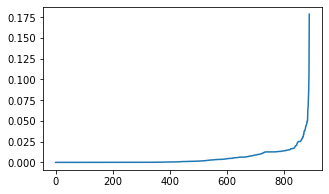

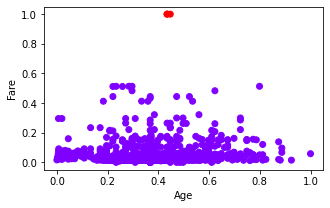

In [39]:
#identifying the potential value of epsilon
from sklearn.neighbors import NearestNeighbors # importing the library
neighbors = NearestNeighbors(n_neighbors=3) 
cluster_dataset = my_working_dataset[["Age","Fare"]]
neighbor_model=neighbors.fit(cluster_dataset) # fitting the data to the object
distances,indices=neighbor_model.kneighbors(cluster_dataset) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show() 
from sklearn.cluster import DBSCAN
dbscan_clustering = DBSCAN(eps=0.3, min_samples=3).fit(cluster_dataset)#running the DBSCAN with the given hyperparameters
labels = dbscan_clustering.labels_
plt.scatter(cluster_dataset['Age'], cluster_dataset['Fare'], c = labels, cmap= "rainbow") # plotting the clusters
plt.xlabel("Age")
plt.ylabel("Fare") 
plt.show() 

[0.5701823409028559, 0.59318581219743, 0.6725258755762358, 0.7384984754949606, 0.8201404209441664, 0.6915730812938957, 0.6508646972259998, 0.6112313933031738, 0.5820638317988543, 0.6036940942395052, 0.5521235942035344, 0.564260551406036, 0.5363475471837953]


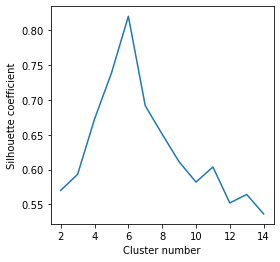

In [40]:

from sklearn.cluster import KMeans
clustering_dataset = my_working_dataset[['Age','Fare','Sex', 'Pclass']] #giving the dataset with spesific features
#Creating a list of silhouette coefficient values
Silhouette_coefficient = []
#a loop with 9 iterations is implemented (9 different values for the number of clusters)
# 1 cluster is not considered in this case because it is not meaningful to calculate the silhouette coefficient 
#for 1 cluster
for i in range(2,15):
   #Creation of a K-means clustering model from 2 to 14 clusters and appending the silhouette
   kmeans_model = KMeans(n_clusters = i, init = "k-means++")   
   kmeans_model.fit(clustering_dataset)
   #Calculating the Silhouette coeffcient
   Silhouette_coefficient.append(metrics.silhouette_score(clustering_dataset, kmeans_model.labels_))
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,15), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

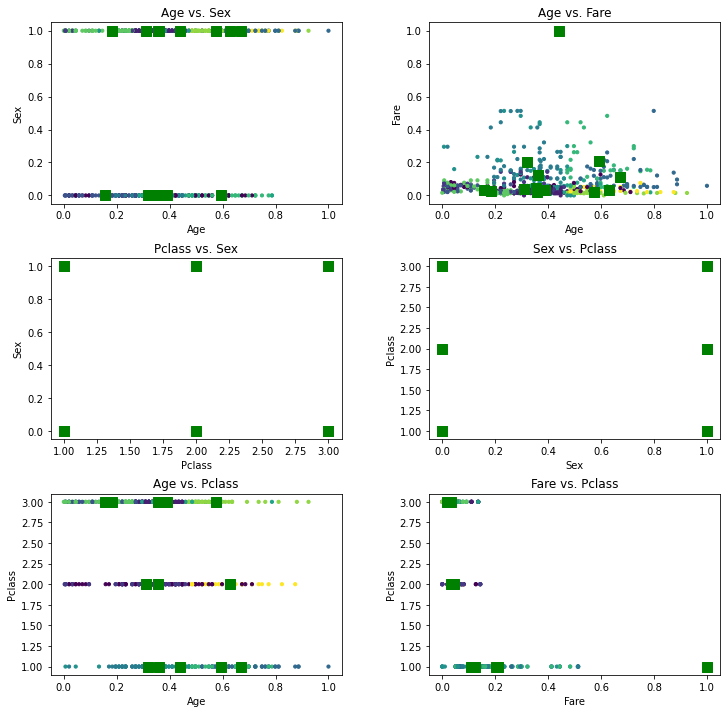

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clustering_dataset = my_working_dataset[['Age', 'Fare', 'Sex', 'Pclass']]

# Creating a K-means model with 6 clusters
kmeans_model = KMeans(n_clusters=13, init="k-means++").fit(clustering_dataset)

# Acquiring cluster centers
centroids = kmeans_model.cluster_centers_

# Make predictions for cluster membership of data objects
y_pred = kmeans_model.predict(clustering_dataset)

# Create a 3x2 subplot layout
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1: Age vs. Sex
axs[0, 0].scatter(clustering_dataset['Age'], clustering_dataset['Sex'], s=10, c=y_pred)
axs[0, 0].scatter(centroids[:, 0], centroids[:, 2], s=100, c='g', marker='s')
axs[0, 0].set_title('Age vs. Sex')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Sex')

# Plot 2: Age vs. Fare
axs[0, 1].scatter(clustering_dataset['Age'], clustering_dataset['Fare'], s=10, c=y_pred)
axs[0, 1].scatter(centroids[:, 0], centroids[:, 1], s=100, c='g', marker='s')
axs[0, 1].set_title('Age vs. Fare')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Fare')

# Plot 3: Pclass vs. Sex
axs[1, 0].scatter(clustering_dataset['Pclass'], clustering_dataset['Sex'], s=10, c=y_pred)
axs[1, 0].scatter(centroids[:, 3], centroids[:, 2], s=100, c='g', marker='s')
axs[1, 0].set_title('Pclass vs. Sex')
axs[1, 0].set_xlabel('Pclass')
axs[1, 0].set_ylabel('Sex')

# Plot 4: Sex vs. Pclass
axs[1, 1].scatter(clustering_dataset['Sex'], clustering_dataset['Pclass'], s=10, c=y_pred)
axs[1, 1].scatter(centroids[:, 2], centroids[:, 3], s=100, c='g', marker='s')
axs[1, 1].set_title('Sex vs. Pclass')
axs[1, 1].set_xlabel('Sex')
axs[1, 1].set_ylabel('Pclass')

# Plot 5: Age vs. Pclass
axs[2, 0].scatter(clustering_dataset['Age'], clustering_dataset['Pclass'], s=10, c=y_pred)
axs[2, 0].scatter(centroids[:, 0], centroids[:, 3], s=100, c='g', marker='s')
axs[2, 0].set_title('Age vs. Pclass')
axs[2, 0].set_xlabel('Age')
axs[2, 0].set_ylabel('Pclass')

# Plot 6: Fare vs. Pclass
axs[2, 1].scatter(clustering_dataset['Fare'], clustering_dataset['Pclass'], s=10, c=y_pred)
axs[2, 1].scatter(centroids[:, 1], centroids[:, 3], s=100, c='g', marker='s')
axs[2, 1].set_title('Fare vs. Pclass')
axs[2, 1].set_xlabel('Fare')
axs[2, 1].set_ylabel('Pclass')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Display the plot
plt.show()